# Car Dekho - Car price prediction
using Regression with keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import tensorflow.keras
import seaborn as sns
%matplotlib inline

In [2]:
car_df=pd.read_csv('car.csv')
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
car_df.shape

(4340, 8)

In [4]:
car_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


<AxesSubplot:>

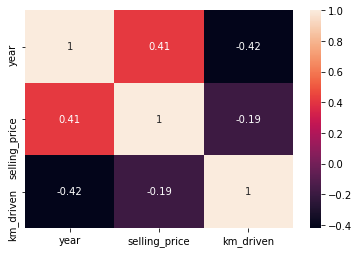

In [12]:
sns.heatmap(car_df.corr(),annot=True)

In [6]:
car_df.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

In [7]:
car_df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [8]:
car_df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [9]:
car_df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [10]:
car_df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

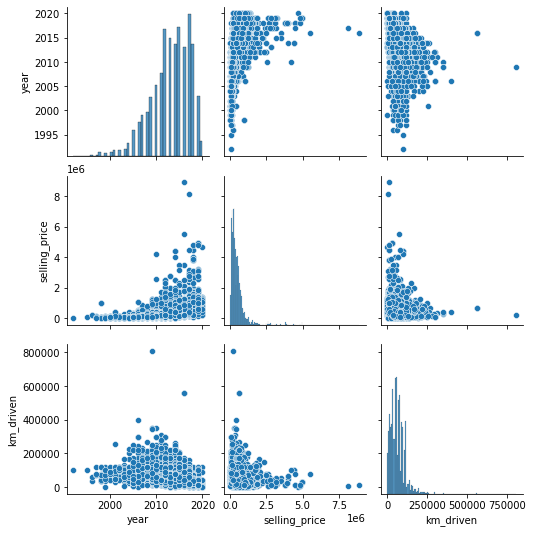

In [13]:
sns.pairplot(data=car_df)

## Data Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [19]:
car_df['fuel']=label_encoder.fit_transform(car_df['fuel'])
car_df['seller_type']=label_encoder.fit_transform(car_df['seller_type'])
car_df['transmission']=label_encoder.fit_transform(car_df['transmission'])
car_df['owner']=label_encoder.fit_transform(car_df['owner'])
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [21]:
car = car_df.drop(['name'],axis=1)
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,4,1,1,0
1,2007,135000,50000,4,1,1,0
2,2012,600000,100000,1,1,1,0
3,2017,250000,46000,4,1,1,0
4,2014,450000,141000,1,1,1,2


In [22]:
car.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

## Predictor, Target split

In [38]:
X=car[['year', 'km_driven', 'fuel', 'seller_type','transmission', 'owner']].values
y=car['selling_price'].values
print('X :\n',X[0:4])
print('y: \n',y[0:4])

X :
 [[  2007  70000      4      1      1      0]
 [  2007  50000      4      1      1      0]
 [  2012 100000      1      1      1      0]
 [  2017  46000      4      1      1      0]]
y: 
 [ 60000 135000 600000 250000]


## Data Normalization

In [39]:
from sklearn.preprocessing import StandardScaler

In [44]:
X=StandardScaler().fit(X).transform(X.astype(float))
X[0:4]

array([[-1.44507431,  0.08113906,  1.01499338,  0.44819164,  0.33927557,
        -0.66507931],
       [-1.44507431, -0.3476891 ,  1.01499338,  0.44819164,  0.33927557,
        -0.66507931],
       [-0.2587948 ,  0.7243813 , -0.97405145,  0.44819164,  0.33927557,
        -0.66507931],
       [ 0.92748471, -0.43345473,  1.01499338,  0.44819164,  0.33927557,
        -0.66507931]])

## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f'Train Set: {X_train.shape,y_train.shape}')
print(f' Test Set: {X_test.shape,y_test.shape}')

Train Set: ((3472, 6), (3472,))
 Test Set: ((868, 6), (868,))


## Modelling

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [72]:
n_cols=X.shape[1]
n_cols

6

In [56]:
def regression_model():
    model=Sequential()
    model.add(Dense(6,activation='relu',input_shape=(n_cols,)))
    model.add(Dense(6,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

In [77]:
model=regression_model()
model.fit(X_train,y_train, validation_data=(X_test,y_test) ,epochs=500, verbose=1,callbacks=[early_stop])

Epoch 1/500
109/109 [==============================] - 1s 4ms/step - loss: 599770333184.0000 - val_loss: 544844611584.0000
Epoch 2/500
109/109 [==============================] - 0s 2ms/step - loss: 599768891392.0000 - val_loss: 544842579968.0000
Epoch 3/500
109/109 [==============================] - 0s 3ms/step - loss: 599764893696.0000 - val_loss: 544837206016.0000
Epoch 4/500
109/109 [==============================] - 0s 2ms/step - loss: 599756505088.0000 - val_loss: 544826294272.0000
Epoch 5/500
109/109 [==============================] - 0s 2ms/step - loss: 599740383232.0000 - val_loss: 544807092224.0000
Epoch 6/500
109/109 [==============================] - 0s 2ms/step - loss: 599714693120.0000 - val_loss: 544777928704.0000
Epoch 7/500
109/109 [==============================] - 0s 2ms/step - loss: 599676485632.0000 - val_loss: 544735625216.0000
Epoch 8/500
109/109 [==============================] - 0s 2ms/step - loss: 599623401472.0000 - val_loss: 544679624704.0000
Epoch 9/500
109/

109/109 [==============================] - 0s 2ms/step - loss: 531536805888.0000 - val_loss: 482352431104.0000
Epoch 68/500
109/109 [==============================] - 0s 2ms/step - loss: 529149591552.0000 - val_loss: 480202817536.0000
Epoch 69/500
109/109 [==============================] - 0s 1ms/step - loss: 526706540544.0000 - val_loss: 477981933568.0000
Epoch 70/500
109/109 [==============================] - 0s 2ms/step - loss: 524228132864.0000 - val_loss: 475732443136.0000
Epoch 71/500
109/109 [==============================] - 0s 2ms/step - loss: 521700147200.0000 - val_loss: 473498714112.0000
Epoch 72/500
109/109 [==============================] - 0s 2ms/step - loss: 519141883904.0000 - val_loss: 471193190400.0000
Epoch 73/500
109/109 [==============================] - 0s 2ms/step - loss: 516567007232.0000 - val_loss: 468845264896.0000
Epoch 74/500
109/109 [==============================] - 0s 2ms/step - loss: 513938817024.0000 - val_loss: 466479316992.0000
Epoch 75/500
109/109 

Epoch 133/500
109/109 [==============================] - 0s 2ms/step - loss: 322236973056.0000 - val_loss: 297972858880.0000
Epoch 134/500
109/109 [==============================] - 0s 2ms/step - loss: 319019188224.0000 - val_loss: 295306133504.0000
Epoch 135/500
109/109 [==============================] - 0s 3ms/step - loss: 315845246976.0000 - val_loss: 292622958592.0000
Epoch 136/500
109/109 [==============================] - 0s 3ms/step - loss: 312703156224.0000 - val_loss: 289997586432.0000
Epoch 137/500
109/109 [==============================] - 0s 3ms/step - loss: 309568897024.0000 - val_loss: 287318278144.0000
Epoch 138/500
109/109 [==============================] - 0s 3ms/step - loss: 306487656448.0000 - val_loss: 284773154816.0000
Epoch 139/500
109/109 [==============================] - 0s 3ms/step - loss: 303423750144.0000 - val_loss: 282161381376.0000
Epoch 140/500
109/109 [==============================] - 0s 3ms/step - loss: 300407881728.0000 - val_loss: 279623073792.0000


109/109 [==============================] - 0s 3ms/step - loss: 204850151424.0000 - val_loss: 207146467328.0000
Epoch 199/500
109/109 [==============================] - 0s 3ms/step - loss: 204352503808.0000 - val_loss: 206864171008.0000
Epoch 200/500
109/109 [==============================] - 0s 3ms/step - loss: 203880480768.0000 - val_loss: 206599258112.0000
Epoch 201/500
109/109 [==============================] - 0s 3ms/step - loss: 203411767296.0000 - val_loss: 206353235968.0000
Epoch 202/500
109/109 [==============================] - 0s 3ms/step - loss: 202984964096.0000 - val_loss: 206098219008.0000
Epoch 203/500
109/109 [==============================] - 0s 2ms/step - loss: 202572333056.0000 - val_loss: 205871808512.0000
Epoch 204/500
109/109 [==============================] - 0s 3ms/step - loss: 202160914432.0000 - val_loss: 205643071488.0000
Epoch 205/500
109/109 [==============================] - 0s 2ms/step - loss: 201772498944.0000 - val_loss: 205424525312.0000
Epoch 206/500


109/109 [==============================] - 0s 3ms/step - loss: 188803219456.0000 - val_loss: 197411667968.0000
Epoch 264/500
109/109 [==============================] - 0s 3ms/step - loss: 188638576640.0000 - val_loss: 197327552512.0000
Epoch 265/500
109/109 [==============================] - 0s 3ms/step - loss: 188484714496.0000 - val_loss: 197204574208.0000
Epoch 266/500
109/109 [==============================] - 0s 3ms/step - loss: 188335112192.0000 - val_loss: 197093228544.0000
Epoch 267/500
109/109 [==============================] - 0s 4ms/step - loss: 188184412160.0000 - val_loss: 196990369792.0000
Epoch 268/500
109/109 [==============================] - 0s 3ms/step - loss: 188034383872.0000 - val_loss: 196896768000.0000
Epoch 269/500
109/109 [==============================] - 0s 3ms/step - loss: 187872198656.0000 - val_loss: 196786094080.0000
Epoch 270/500
109/109 [==============================] - 0s 2ms/step - loss: 187727659008.0000 - val_loss: 196662640640.0000
Epoch 271/500


109/109 [==============================] - 0s 3ms/step - loss: 180927070208.0000 - val_loss: 191749783552.0000
Epoch 329/500
109/109 [==============================] - 0s 3ms/step - loss: 180833845248.0000 - val_loss: 191656116224.0000
Epoch 330/500
109/109 [==============================] - 0s 3ms/step - loss: 180748599296.0000 - val_loss: 191596691456.0000
Epoch 331/500
109/109 [==============================] - 0s 3ms/step - loss: 180659290112.0000 - val_loss: 191520964608.0000
Epoch 332/500
109/109 [==============================] - 0s 3ms/step - loss: 180567539712.0000 - val_loss: 191464161280.0000
Epoch 333/500
109/109 [==============================] - 0s 3ms/step - loss: 180484980736.0000 - val_loss: 191391334400.0000
Epoch 334/500
109/109 [==============================] - 0s 3ms/step - loss: 180392099840.0000 - val_loss: 191313805312.0000
Epoch 335/500
109/109 [==============================] - 0s 3ms/step - loss: 180311293952.0000 - val_loss: 191273910272.0000
Epoch 336/500


109/109 [==============================] - 0s 2ms/step - loss: 176424140800.0000 - val_loss: 188396077056.0000
Epoch 394/500
109/109 [==============================] - 0s 2ms/step - loss: 176375005184.0000 - val_loss: 188361867264.0000
Epoch 395/500
109/109 [==============================] - 0s 2ms/step - loss: 176318988288.0000 - val_loss: 188328804352.0000
Epoch 396/500
109/109 [==============================] - 0s 3ms/step - loss: 176264249344.0000 - val_loss: 188247965696.0000
Epoch 397/500
109/109 [==============================] - 0s 2ms/step - loss: 176208166912.0000 - val_loss: 188213624832.0000
Epoch 398/500
109/109 [==============================] - 0s 2ms/step - loss: 176167976960.0000 - val_loss: 188178923520.0000
Epoch 399/500
109/109 [==============================] - 0s 2ms/step - loss: 176106373120.0000 - val_loss: 188136275968.0000
Epoch 400/500
109/109 [==============================] - 0s 2ms/step - loss: 176064757760.0000 - val_loss: 188107866112.0000
Epoch 401/500


109/109 [==============================] - 0s 2ms/step - loss: 173636780032.0000 - val_loss: 186261831680.0000
Epoch 459/500
109/109 [==============================] - 0s 2ms/step - loss: 173600587776.0000 - val_loss: 186235895808.0000
Epoch 460/500
109/109 [==============================] - 0s 3ms/step - loss: 173573160960.0000 - val_loss: 186221035520.0000
Epoch 461/500
109/109 [==============================] - 0s 3ms/step - loss: 173530480640.0000 - val_loss: 186205126656.0000
Epoch 462/500
109/109 [==============================] - 0s 3ms/step - loss: 173497843712.0000 - val_loss: 186154516480.0000
Epoch 463/500
109/109 [==============================] - 0s 3ms/step - loss: 173469302784.0000 - val_loss: 186118668288.0000
Epoch 464/500
109/109 [==============================] - 0s 3ms/step - loss: 173425426432.0000 - val_loss: 186117013504.0000
Epoch 465/500
109/109 [==============================] - 0s 4ms/step - loss: 173394722816.0000 - val_loss: 186067435520.0000
Epoch 466/500


In [78]:
pred=model.predict(X_test)
pred[0]

array([282756.], dtype=float32)

In [80]:
y_test[0]

165000

In [79]:
from sklearn.metrics import classification_report
classification_report(y_test,pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets